<a href="https://colab.research.google.com/github/EnidFerns/ml/blob/main/kmeans2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#normalisation using minmax scaler method under preprocessing

In [2]:
#k=3

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Verzeo ML Feb Batch/K MEANS2.csv')

In [5]:
df

,Name,Age,Income($)
0,A,27,70000
1,B,29,90000
2,C,29,61000
3,D,28,60000
4,E,42,150000
5,F,39,155000
6,G,41,160000
7,H,38,162000
8,I,36,156000
9,J,35,130000


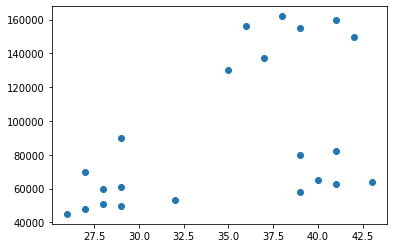

In [6]:
plt.scatter(df["Age"],df["Income($)"])
plt.show()

In [7]:
km = KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
#df = df.drop(columns='Name', axis='columns')

In [9]:
y_pred = km.fit_predict(df[['Age','Income($)']])
y_pred

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [10]:
df["cluster"] = y_pred
df

,Name,Age,Income($),cluster
0,A,27,70000,0
1,B,29,90000,0
2,C,29,61000,2
3,D,28,60000,2
4,E,42,150000,1
5,F,39,155000,1
6,G,41,160000,1
7,H,38,162000,1
8,I,36,156000,1
9,J,35,130000,1


In [11]:
df.head()

,Name,Age,Income($),cluster
0,A,27,70000,0
1,B,29,90000,0
2,C,29,61000,2
3,D,28,60000,2
4,E,42,150000,1


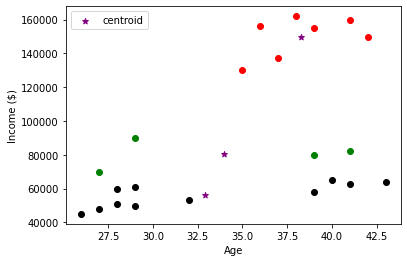

In [14]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [15]:
#scaling

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [19]:
df

,Name,Age,Income($),cluster
0,A,0.058824,0.213675,0
1,B,0.176471,0.384615,0
2,C,0.176471,0.136752,2
3,D,0.117647,0.128205,2
4,E,0.941176,0.897436,1
5,F,0.764706,0.940171,1
6,G,0.882353,0.982906,1
7,H,0.705882,1.000000,1
8,I,0.588235,0.948718,1
9,J,0.529412,0.726496,1


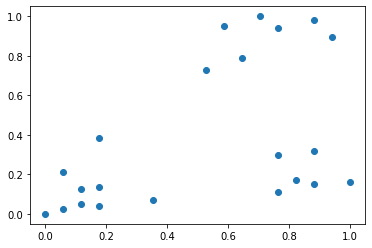

In [20]:
plt.scatter(df.Age,df['Income($)'])

In [23]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['Age','Income($)']])
y_pred

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [24]:
df['cluster']=y_pred
df.head()

,Name,Age,Income($),cluster
0,A,0.058824,0.213675,0
1,B,0.176471,0.384615,0
2,C,0.176471,0.136752,0
3,D,0.117647,0.128205,0
4,E,0.941176,0.897436,2


In [25]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ]])

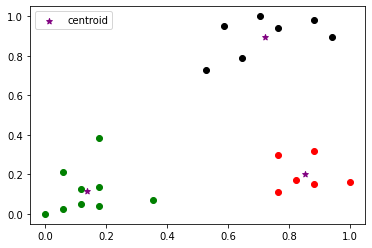

In [26]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [27]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

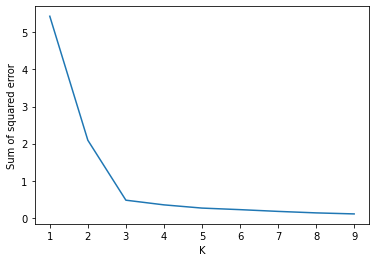

In [28]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)